# Euler Method 

Use straight line to replace function curve.   

In [3]:
%%HTML
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/1/10/Euler_method.svg/1024px-Euler_method.svg.png"  width="500" height="500">


In [6]:
# %load cp_imports.py
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
# Use retina backend for better figures
%config InlineBackend.figure_format = 'retina'


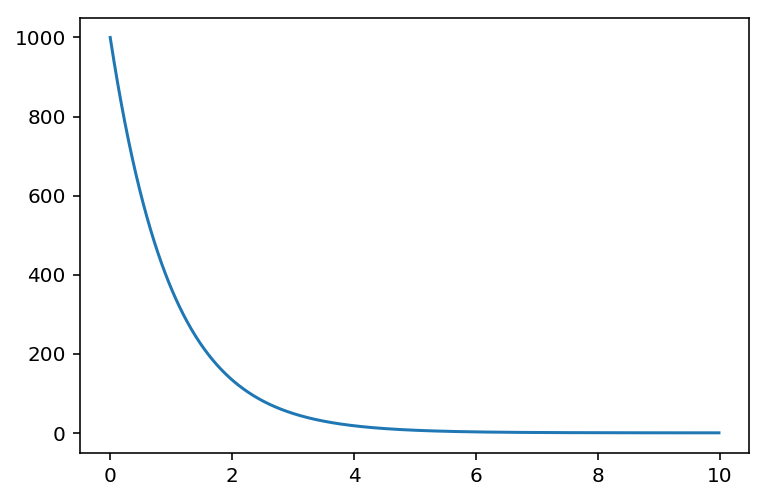

In [15]:
def euler(x, df, f0, h):
    """
    1st order ODE solver with Euler method
    
    x: varible
    df: derivative function of f
    f0: boundary condition 
    h: step 

    return function value of given x array
    """
    f = np.zeros_like(x)
    f[0] = f0
    for i in range(1, len(x)):
        # Calculate next point with backward point
        f[i] = f[i-1] + df(f[i-1]) * h
    return f


decay = lambda f: -f
h = 1e-2
x = np.arange(0, 10, h)
y = euler(x, decay, 1000, h)

plt.plot(x, y)


## Error Estimation

After every evaluation, the error will accumulate with more steps.
We can do a rough estimation about the error of this method.   
Second order error:
\begin{equation}
    O(dx^2) = \frac{d^2f}{dx^2}dx^2
\end{equation}

## Higher Order ODE

For multi-function, higher order ODE equations, we can 
create multi-dimensinal array(or array of tuple) like 1-D array.


(-0.10173759490524022, 2.1364894930100444)

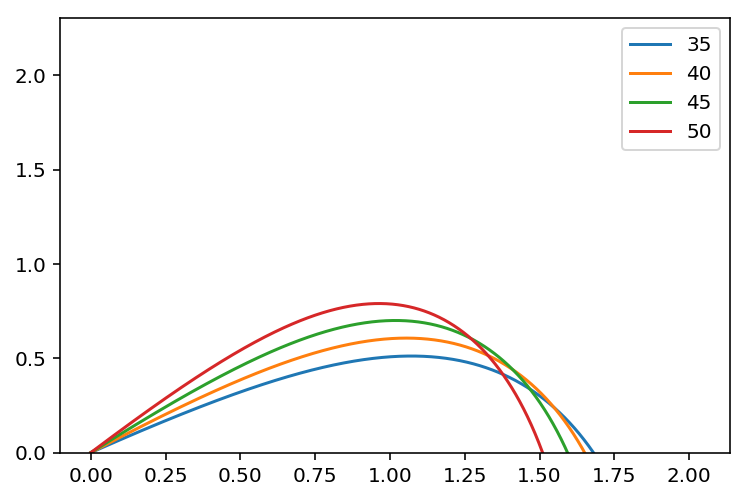

In [57]:
def multi_euler(x, df, f0, h, **args):
    """
    1st order ODE solver with Euler method
    
    x: varible
    df: derivative function of f
    f0: boundary condition 
    h: step 

    return function value of given x array
    """ 
    f = np.zeros((len(x), len(f0)))
    f[0] = f0
    for i in range(1, len(x)):
        # Calculate next point with backward point
        f[i] = f[i-1] + df(f[i-1], **args) * h
    return f


def fall_with_resistance(xs, **args):
    """
    xs: array of size 4
    xs[0]: x coordinate value
    xs[1]: y coordinate value
    xs[2]: x velocity
    xs[3]: y velocity
    """
    g = 10.
    b = 1
    x = xs[2]
    y = xs[3]
    vx = - b * (xs[2]**2 + xs[3]**2)**0.5 * xs[2]
    vy = -g - b * (xs[2]**2 + xs[3]**2)**0.5 * xs[3]
    return np.array([x, y, vx, vy])
    
    
h = 1e-3
t = np.arange(0 ,10, h)

for degree in range(35, 55, 5):
    radian = degree * np.pi / 180
    xs0 = np.array([0, 0, 10 * np.cos(radian), 10 * np.sin(radian)])
    fs = multi_euler(t, fall_with_resistance, xs0, h)
    plt.plot(fs[:, 0], fs[:, 1], label=f"{degree}")

plt.ylim(bottom=0)
plt.legend()
plt.xlim(auto=True)

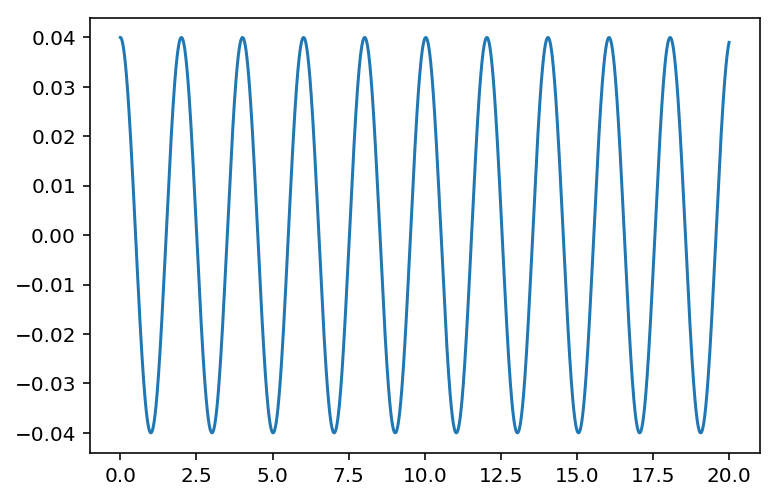

In [58]:
def free_pendulum(xs, dt=1e-3):
    """
    xs: array of size 2
    xs[0]: theta
    xs[1]: omega

    """
    g = 9.8 
    l = 1 # Unit: m
    omega = -g / l * xs[0]      
    theta = xs[1] + omega * dt  
    return np.array([theta, omega])


h = 1e-3
t = np.arange(0, 20, h)
xs0 = np.array([0.04, 0]) # Radian
fs = multi_euler(t, free_pendulum, xs0, h, dt=h)

plt.plot(t, fs[:, 0])


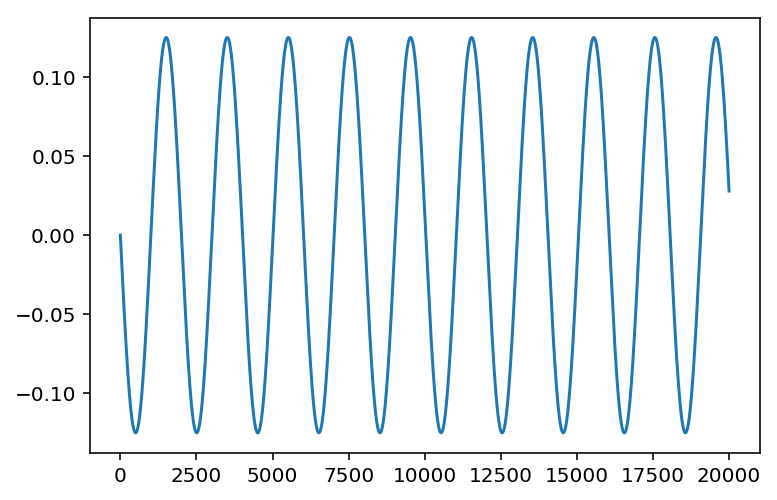

In [49]:
plt.plot(fs[:, 1])